# Classifying handwritten digits(0-9) from 8*8 pixel grayscale images


Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


Load and Explore the Dataset

In [ ]:
digits = load_digits()
print("Shape of data:", digits.data.shape)
print("Number of classes:", len(np.unique(digits.target)))


Shape of data: (1797, 64)
Number of classes: 10


Visualize the digits

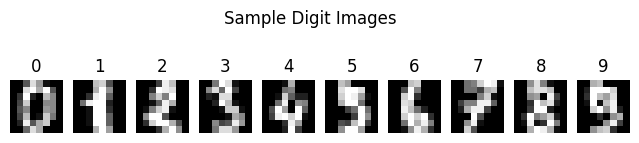

In [ ]:
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.suptitle("Sample Digit Images")
plt.show()


Split the data

In [ ]:
X = digits.data       # 64 features (8x8 pixels)
y = digits.target     # labels (0 to 9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Scale the Features

```
Scaling is required for KNN as it relies on distance Metrics
```



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Make Predictions

In [ ]:
y_pred = knn.predict(X_test)

Evaluate the Model

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  1  0  0  0  0  0 28  0]
 [ 0  0  0  1  1  1  0  0  1 36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                 

# Uploading our own image of a number and using the trained KNN model to predict what digit it is

Install and import Dependencies

In [ ]:
from PIL import Image
import cv2
import io
from google.colab import files


Preprocess the Image

In [ ]:
def preprocess_digit_image(file_path):
    img = Image.open(file_path).convert('L')
    img = img.resize((8, 8), Image.LANCZOS)
    img = np.array(img)


    img = 255 - img
    img = (img / 255.0) * 16
    img = img.flatten().reshape(1, -1)

    return img



Upload an image and get filename

In [ ]:
uploaded = files.upload()


Saving 47921503c7614aa3aaa0cbb4f656a98d.jpg to 47921503c7614aa3aaa0cbb4f656a98d.jpg


In [ ]:
file_name = list(uploaded.keys())[0]

Preprocess

In [ ]:
img_processed = preprocess_digit_image(file_name)


See the processed image before prediction

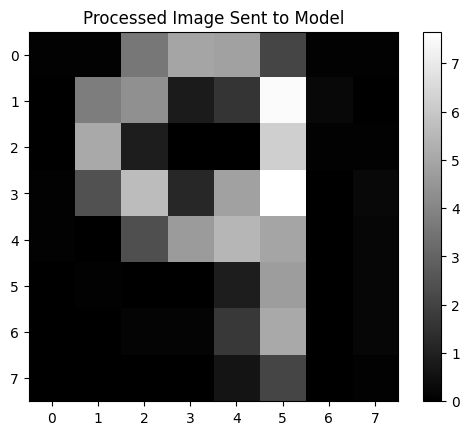

In [ ]:
img_processed2 = preprocess_digit_image(file_name).reshape(8,8)

plt.imshow(img_processed2, cmap='gray')
plt.title("Processed Image Sent to Model")
plt.colorbar()
plt.show()


Scale like the test data

In [ ]:
img_scaled = scaler.transform(img_processed)

Predict digit

In [ ]:
predicted_digit = knn.predict(img_scaled)
print("Predicted digit is:", predicted_digit[0])

Predicted digit is: 9
